<a href="https://colab.research.google.com/github/InsightByHarshit/Titanic-Analysis/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('Copy of titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
#Used to calculate the percentage of missing values in each column.
data.isnull().mean()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [10]:
data.shape[0]

891

In [11]:
data.isnull().sum()/data.shape[0]

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


# **Data Cleaning**

In [12]:
#Dropping this column.
df=data.drop("Cabin",axis=1)

In [13]:
df.isnull().mean()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [14]:
#Age column is filled with the median of the column to avoid any biases caused by extreme values.
df["Age"] = df["Age"].fillna(df["Age"].median())

In [15]:
#Checking for null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
# Remaining rows with any missing values are dropped with
df=df.dropna()

In [17]:
#Verify that all missing values have been successfully removed
df.isnull().mean()

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [18]:
# View the cleaned dataset.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#Check the number of unique values for each feature to better understand categorical and continuous variables.
df.nunique()

,0
PassengerId,889
Survived,2
Pclass,3
Name,889
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,680
Fare,247


In [20]:
#Confirm the new dimensions of the cleaned dataset.
df.shape

(889, 11)

In [21]:
# Save the DataFrame to a CSV file
df.to_csv('titanic_dataset_cleaned.csv')

**The cleaned version of the Titanic dataset with no missing values.**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
# List of continuous (numerical) columns in the dataset
cont_cols = ["Fare", "Age"]

# List of categorical columns in the dataset
# Survived, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
id_cols = ["PassengerId", "Name", "Ticket"]

# **Univariate Analysis**

In [24]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked', ylabel='count'>

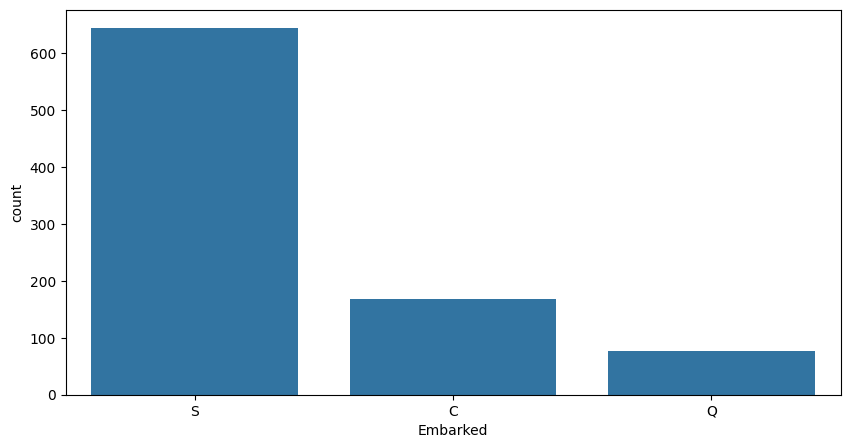

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Embarked',data=df)


<Axes: ylabel='count'>

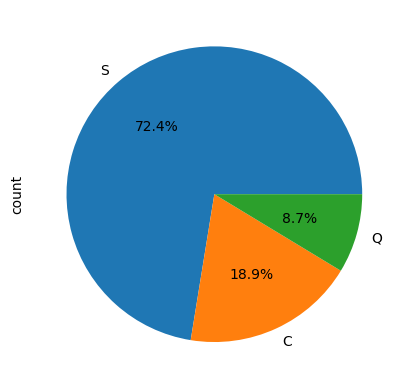

In [26]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='Density'>

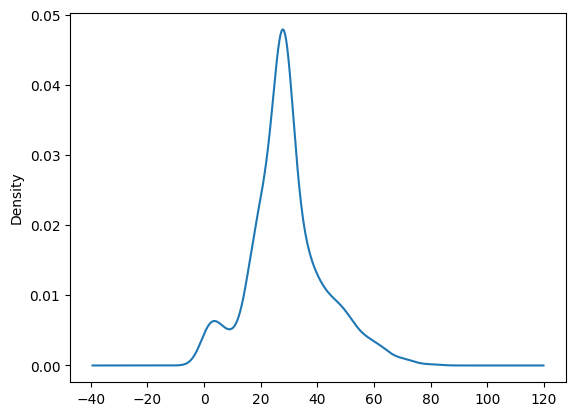

In [28]:
df['Age'].plot(kind='kde')

In [29]:
df['SibSp'].describe()

,SibSp
count,889.000000
mean,0.524184
std,1.103705
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


In [30]:
df['Fare'].describe()

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

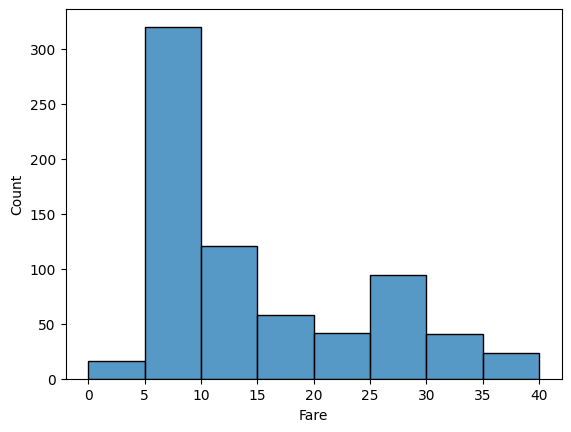

In [31]:
sns.histplot(df["Fare"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])

In [32]:
cont_cols

['Fare', 'Age']

Fare


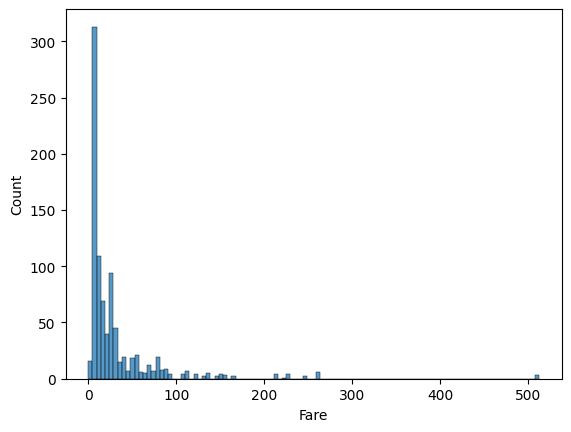

Age


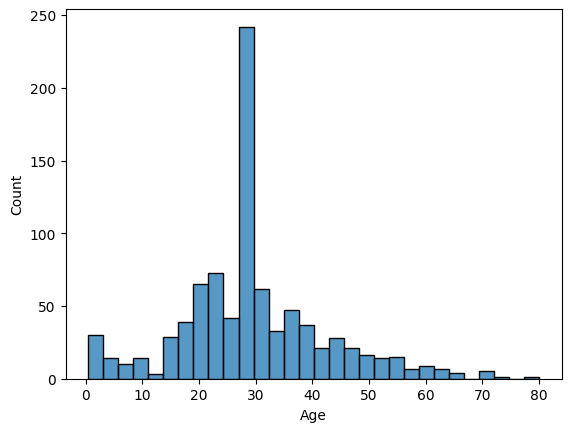

In [33]:
# Looping through each column in the continuous columns list (cont_cols)
for i in cont_cols:

    # Print the name of the current continuous column being processed
    print(i)

    # Plot a histogram for the current column using seaborn's histplot
    sns.histplot(df[i])

    # Display the plot after generating the histogram for the current column
    plt.show()

<Axes: ylabel='Fare'>

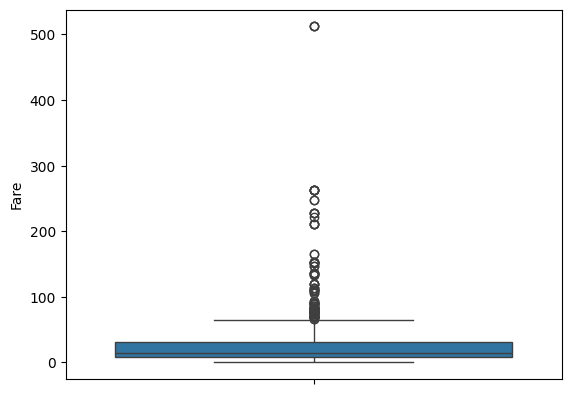

In [34]:
sns.boxplot(df["Fare"])

In [35]:
df["Fare"].describe()

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: ylabel='Age'>

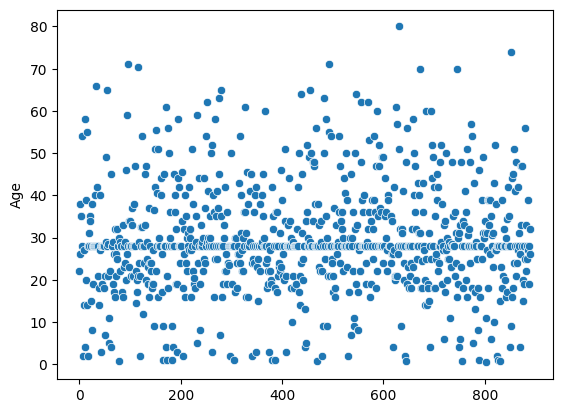

In [37]:
sns.scatterplot(df["Age"])

In [38]:
df=pd.read_csv('titanic_dataset_cleaned.csv')

# **Bivariate**

<Axes: >

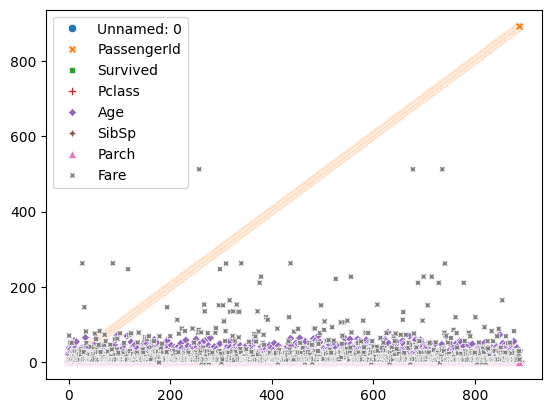

In [39]:
sns.scatterplot(df)

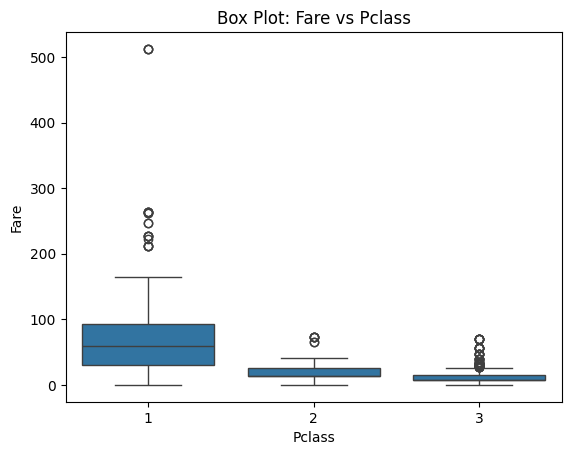

In [40]:
# Boxplot of Fare with Pclass
#sns.boxplot(x='Pclass', y='Fare')
sns.boxplot(x=df["Pclass"],y=df["Fare"])
plt.title('Box Plot: Fare vs Pclass')
plt.show()

In [41]:
print(cat_cols)
print(cont_cols)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
['Fare', 'Age']


In [42]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,340


Survived Vs Fare


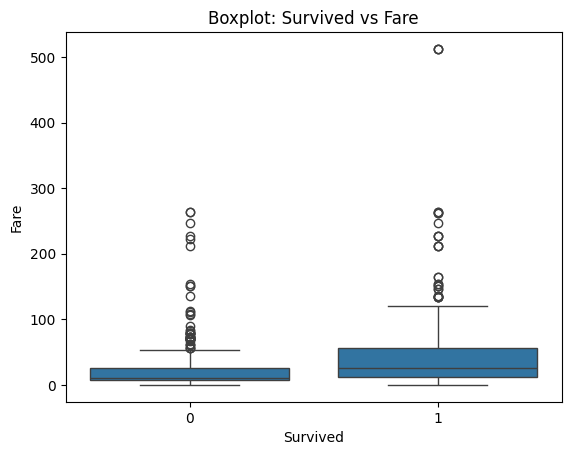

Survived Vs Age


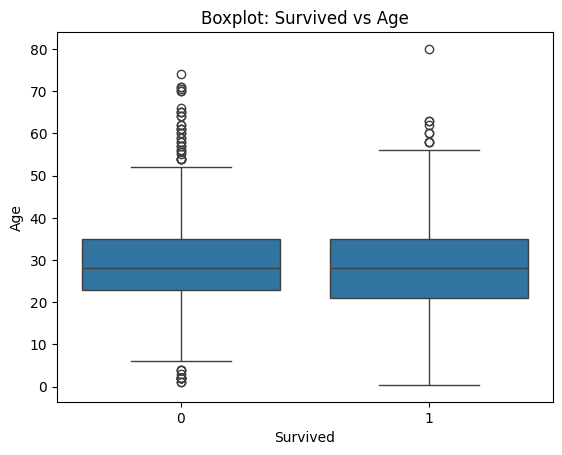

Pclass Vs Fare


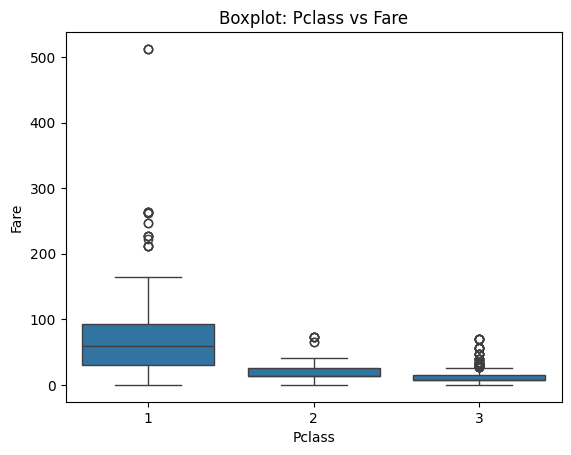

Pclass Vs Age


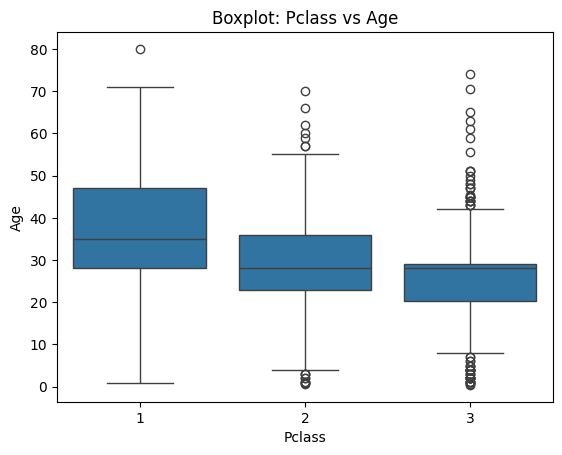

Sex Vs Fare


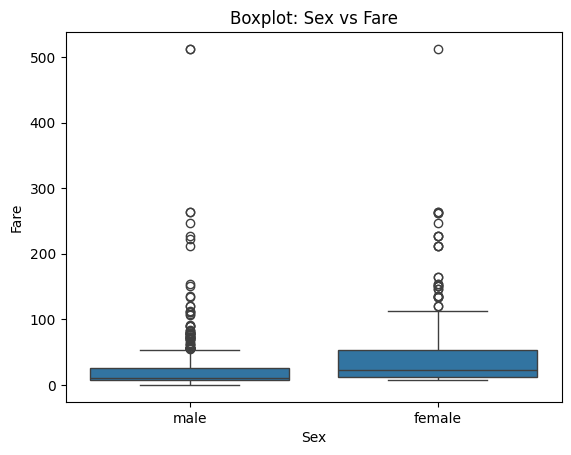

Sex Vs Age


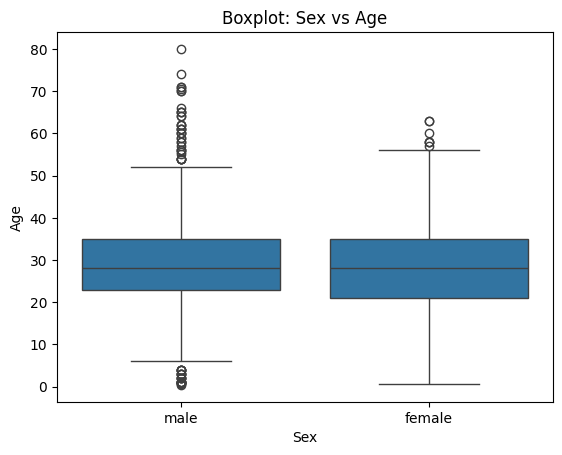

SibSp Vs Fare


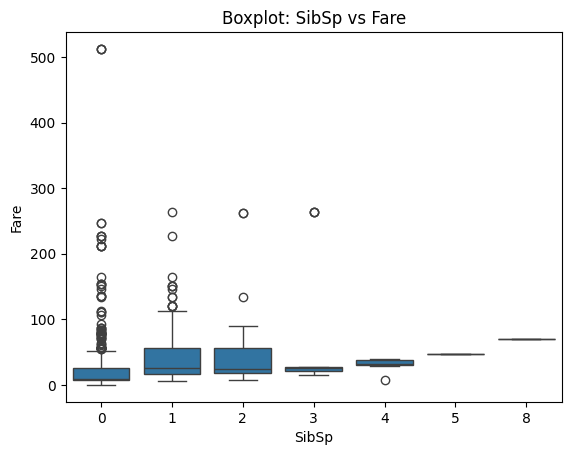

SibSp Vs Age


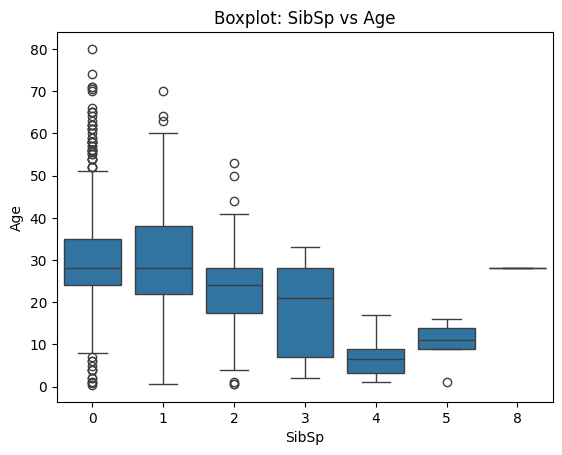

Parch Vs Fare


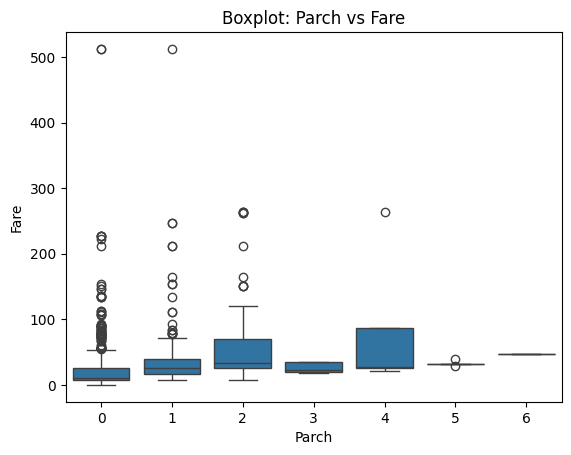

Parch Vs Age


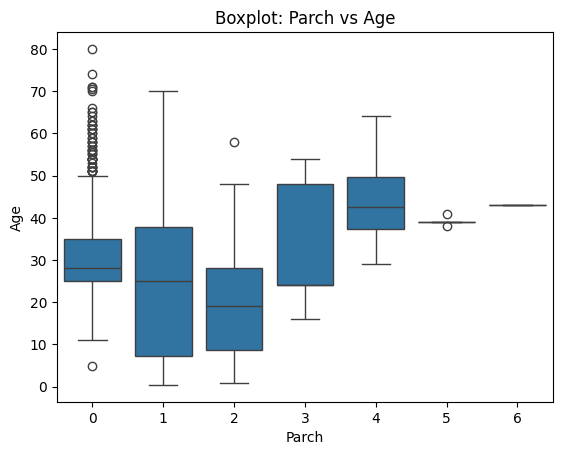

Embarked Vs Fare


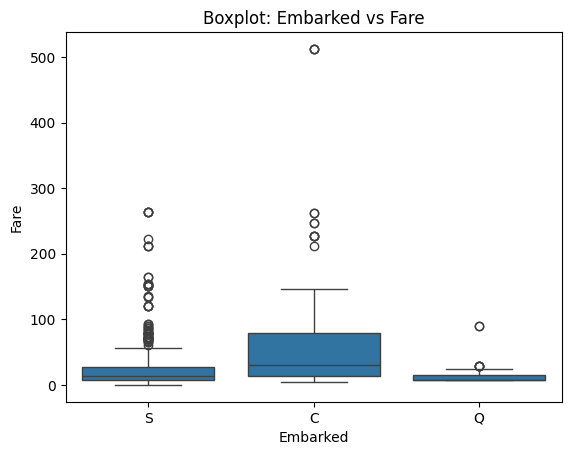

Embarked Vs Age


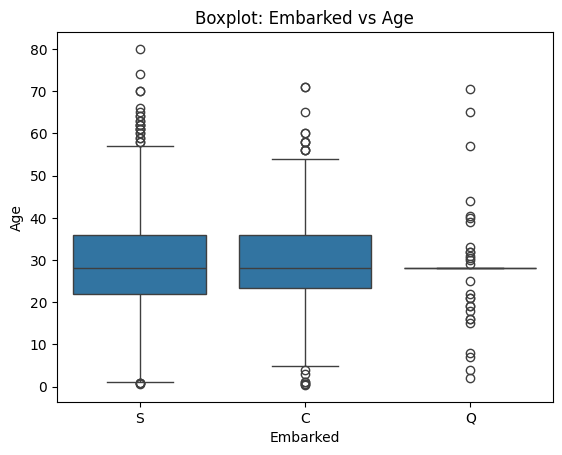

In [44]:
ls = []

for i in cat_cols:
    for j in cont_cols:
        print(i, "Vs", j)
        ls.append((i, j))
        sns.boxplot(x=df[i], y=df[j])  # Explicitly set x and y for the boxplot
        plt.title(f'Boxplot: {i} vs {j}')
        plt.show()

In [45]:
df.groupby('Pclass')['Fare'].mean()

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


In [46]:
df.groupby('Pclass')['Age'].mean().reset_index()

,Pclass,Age
0,1,36.688879
1,2,29.765380
2,3,25.932627


In [47]:
df.groupby('Pclass')['Fare'].mean()

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


<Axes: xlabel='Pclass', ylabel='Fare'>

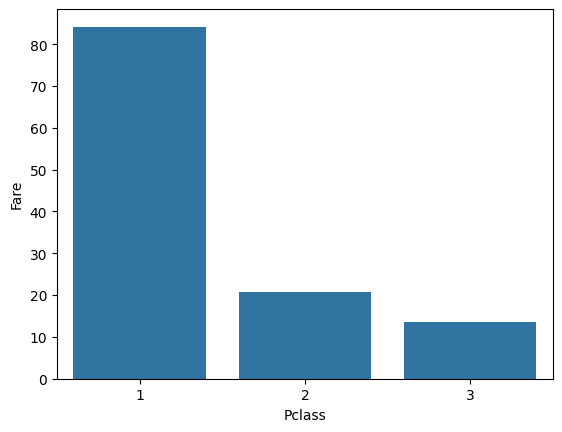

In [48]:
sns.barplot(x=df["Pclass"],y=df["Fare"],ci=None)

Survived Vs Fare


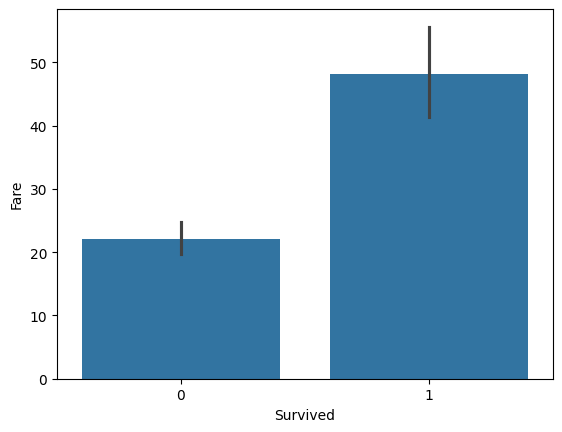

Survived Vs Age


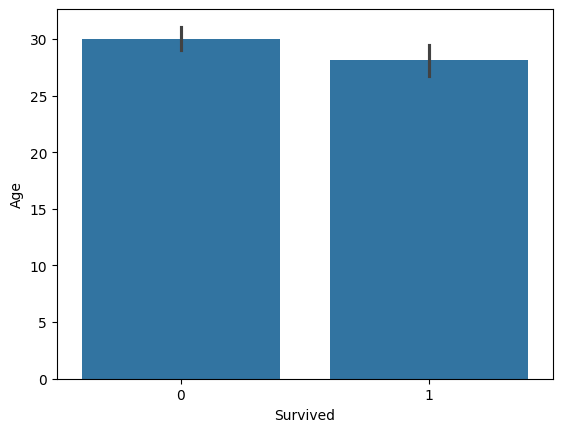

Pclass Vs Fare


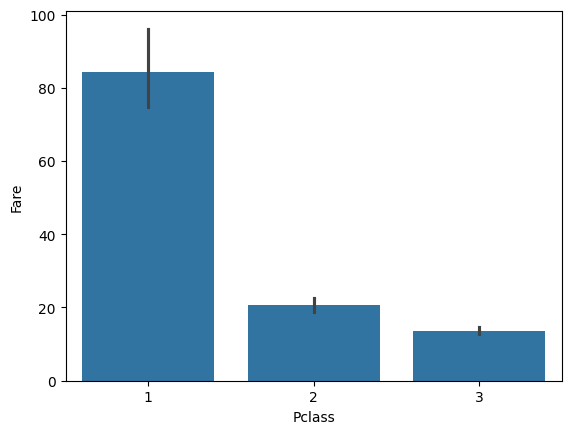

Pclass Vs Age


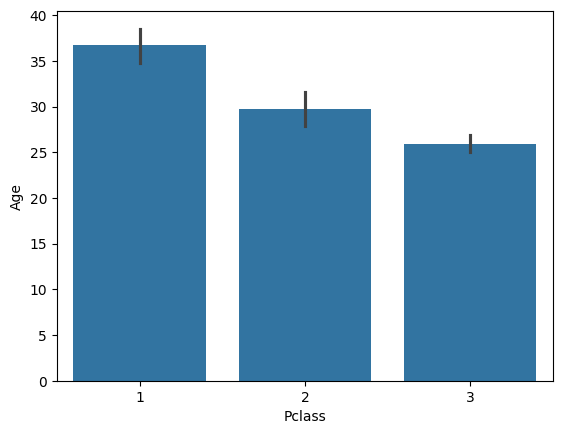

Sex Vs Fare


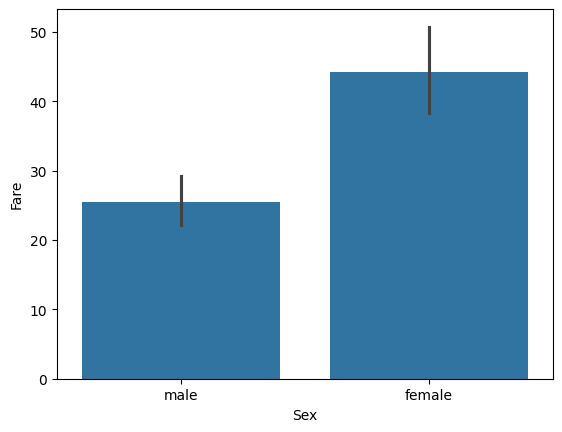

Sex Vs Age


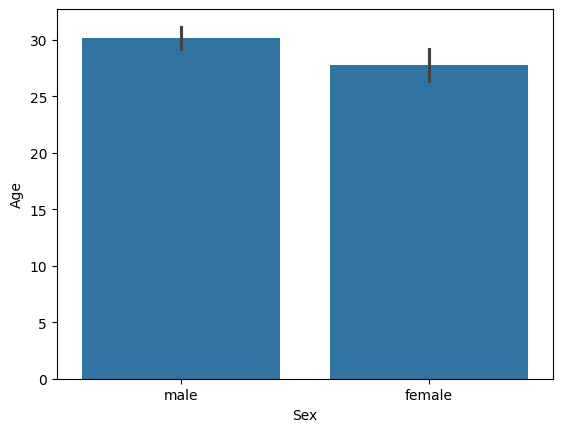

SibSp Vs Fare


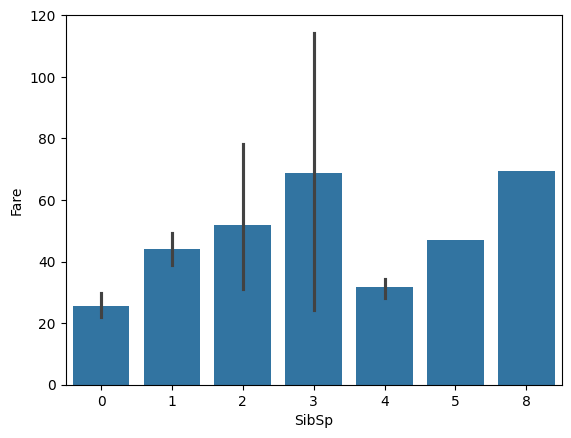

SibSp Vs Age


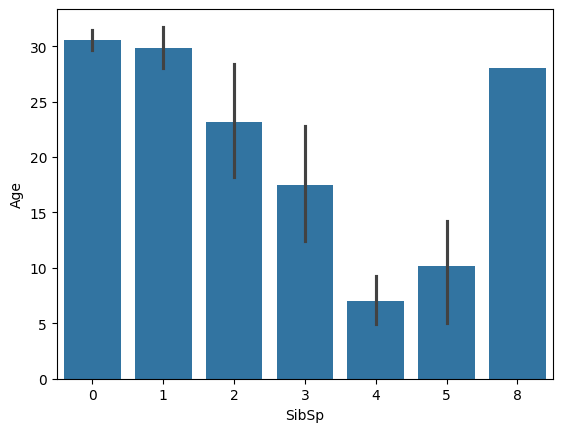

Parch Vs Fare


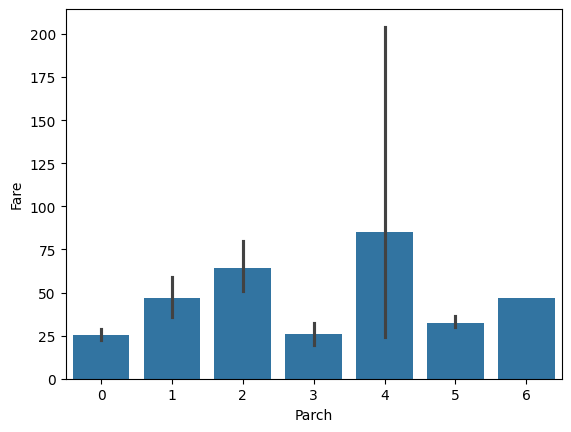

Parch Vs Age


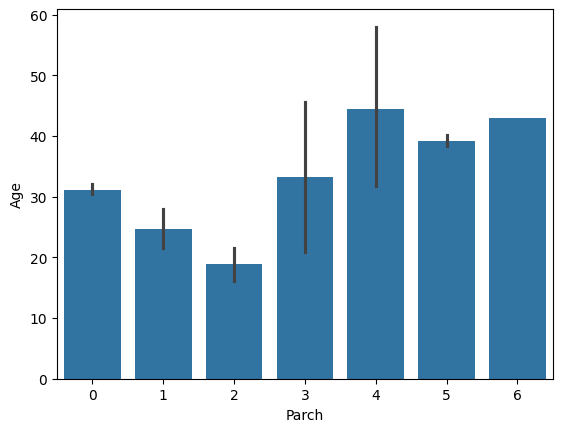

Embarked Vs Fare


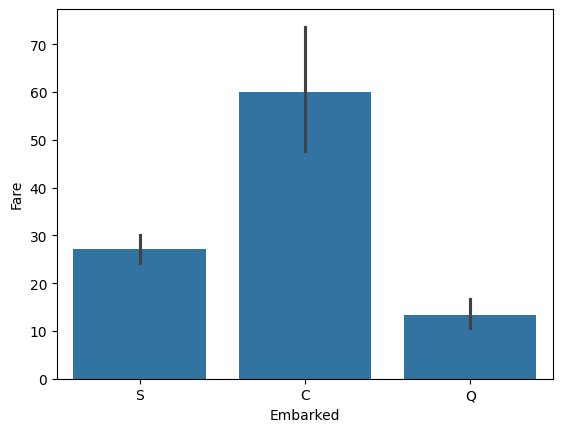

Embarked Vs Age


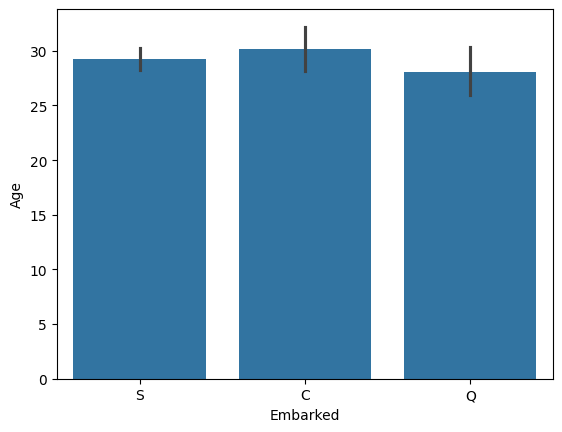

[('Survived', 'Fare'),
 ('Survived', 'Age'),
 ('Pclass', 'Fare'),
 ('Pclass', 'Age'),
 ('Sex', 'Fare'),
 ('Sex', 'Age'),
 ('SibSp', 'Fare'),
 ('SibSp', 'Age'),
 ('Parch', 'Fare'),
 ('Parch', 'Age'),
 ('Embarked', 'Fare'),
 ('Embarked', 'Age'),
 ('Survived', 'Fare'),
 ('Survived', 'Age'),
 ('Pclass', 'Fare'),
 ('Pclass', 'Age'),
 ('Sex', 'Fare'),
 ('Sex', 'Age'),
 ('SibSp', 'Fare'),
 ('SibSp', 'Age'),
 ('Parch', 'Fare'),
 ('Parch', 'Age'),
 ('Embarked', 'Fare'),
 ('Embarked', 'Age')]

In [49]:
for i in cat_cols:
    for j in cont_cols:
        print(i,"Vs",j)
        ls.append((i,j))
        sns.barplot(x=df[i], y=df[j])
        plt.show()
ls

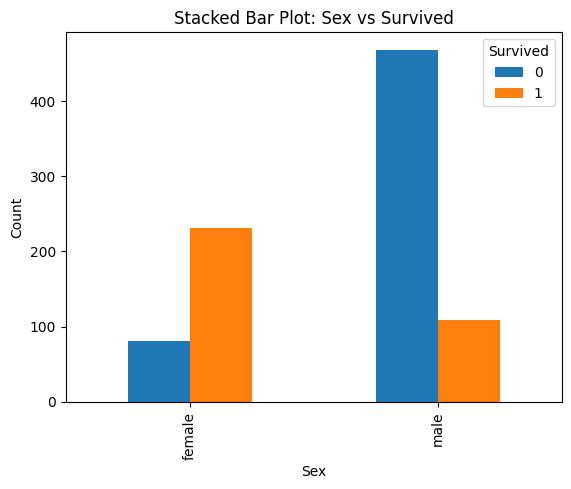

In [50]:
#Plotting a stacked bar chart for Survived and Sex

pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar')
plt.title('Stacked Bar Plot: Sex vs Survived')
plt.ylabel('Count')
plt.show()

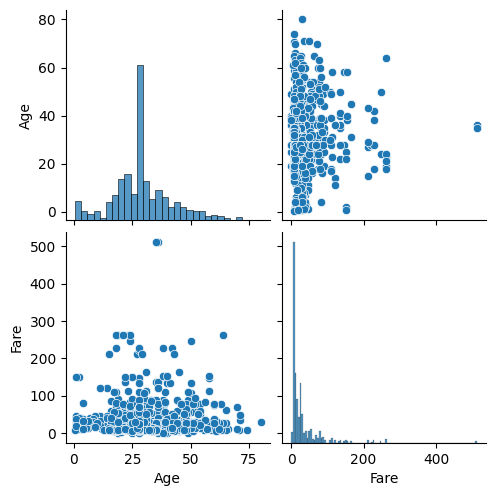

In [51]:
sns.pairplot(df[['Age', 'Fare']].dropna())
plt.show()

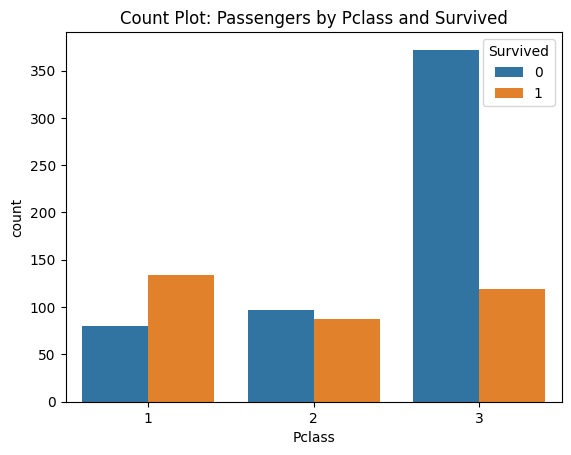

In [52]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Count Plot: Passengers by Pclass and Survived')
plt.show()

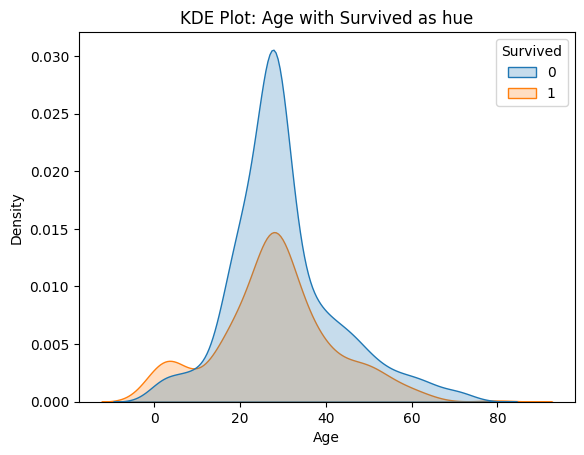

In [53]:
# KDE plot to show density distribution of Age and Fare
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('KDE Plot: Age with Survived as hue')
plt.show()

# **Multivariate Analysis**

<Axes: xlabel='Age', ylabel='Fare'>

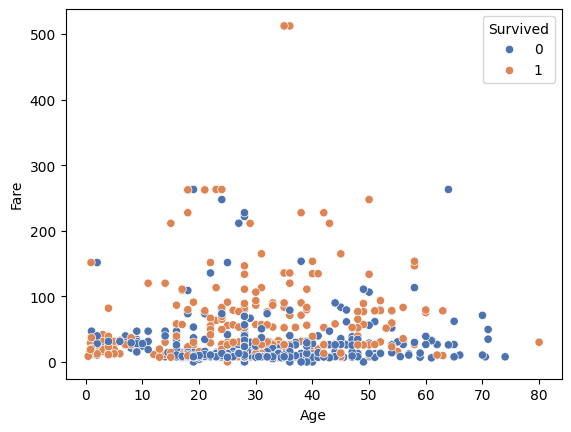

In [54]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='deep')

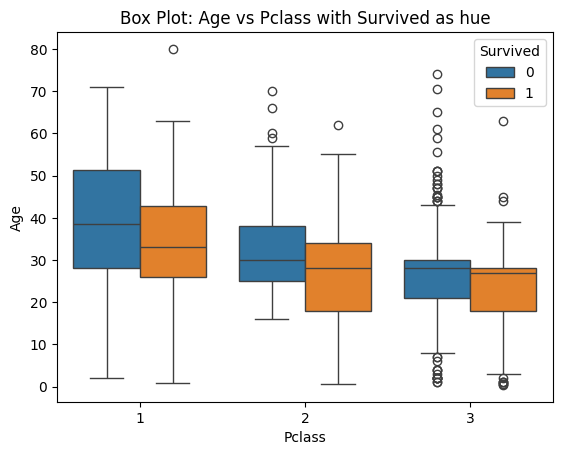

In [55]:
# Box plot of Fare with Survived as hue
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Box Plot: Age vs Pclass with Survived as hue')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

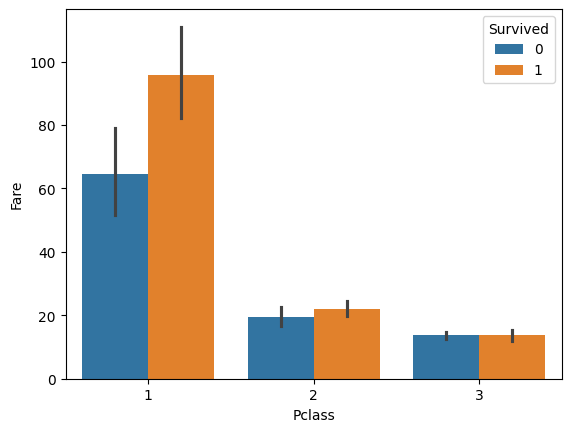

In [56]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')

Survived Vs Fare


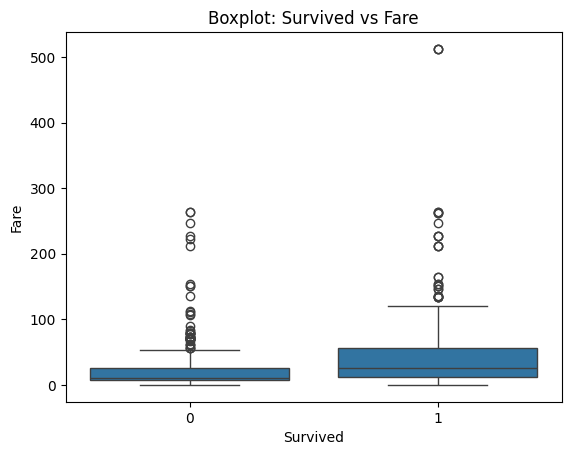

Survived Vs Age


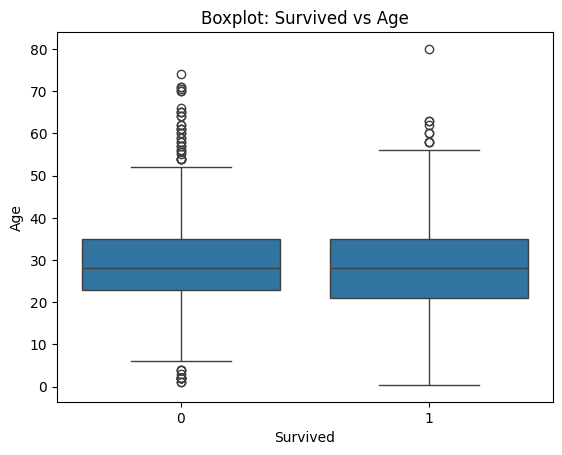

Pclass Vs Fare


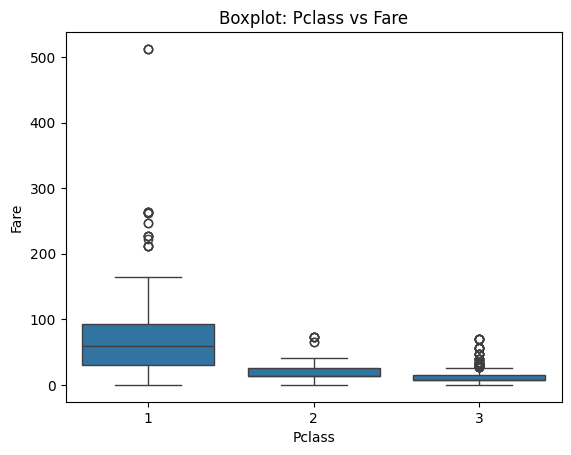

Pclass Vs Age


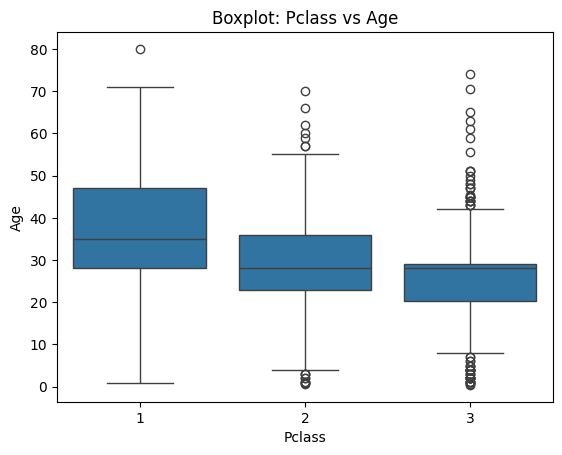

Sex Vs Fare


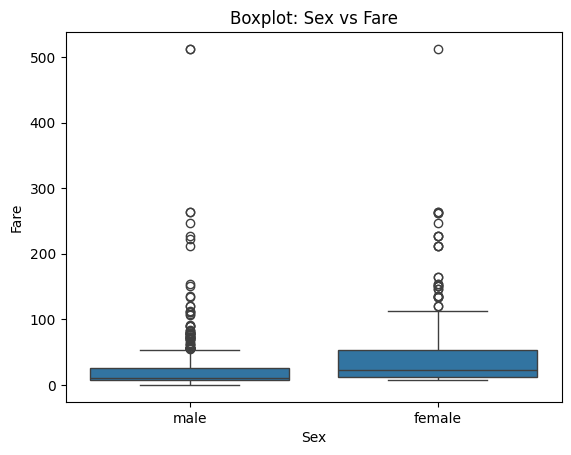

Sex Vs Age


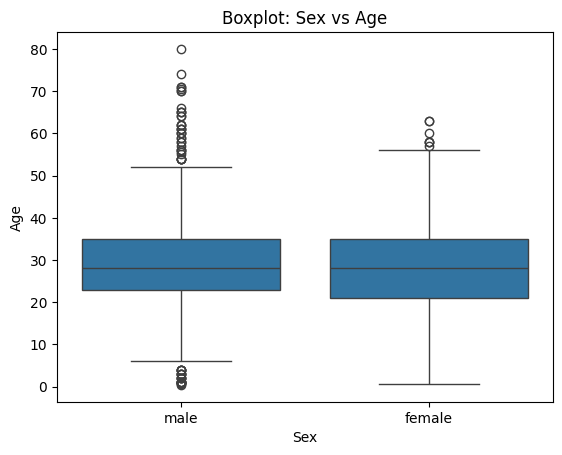

SibSp Vs Fare


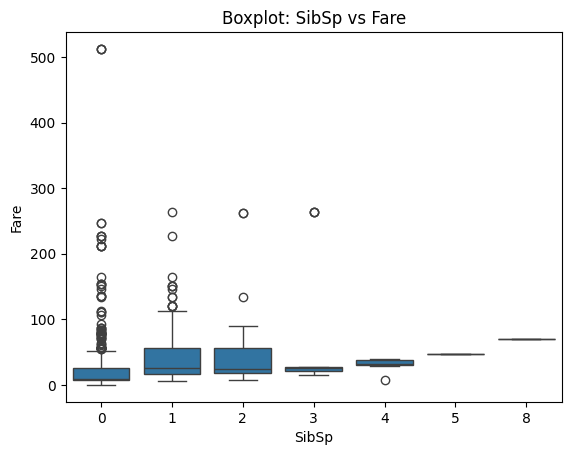

SibSp Vs Age


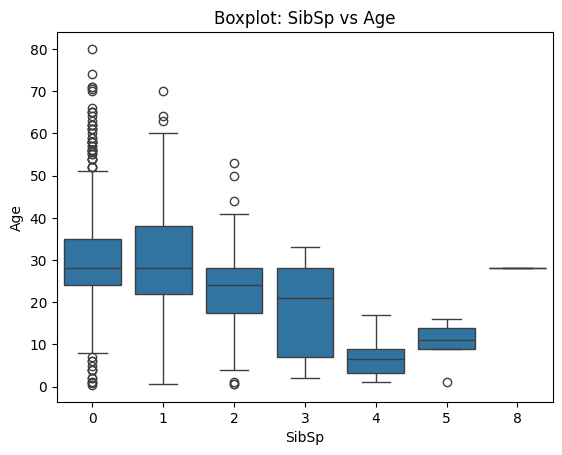

Parch Vs Fare


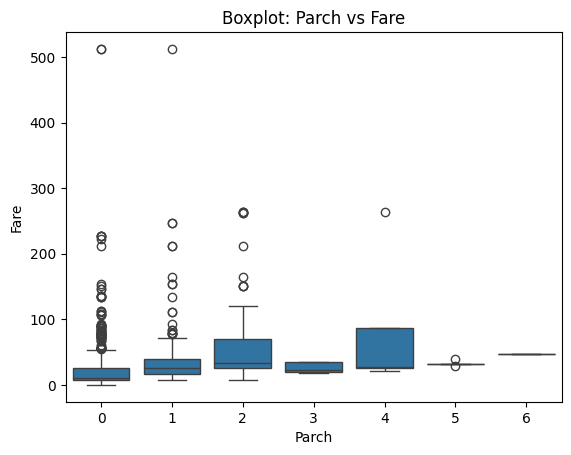

Parch Vs Age


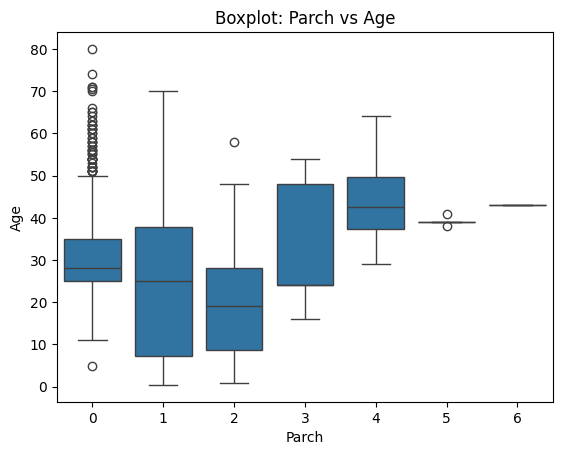

Embarked Vs Fare


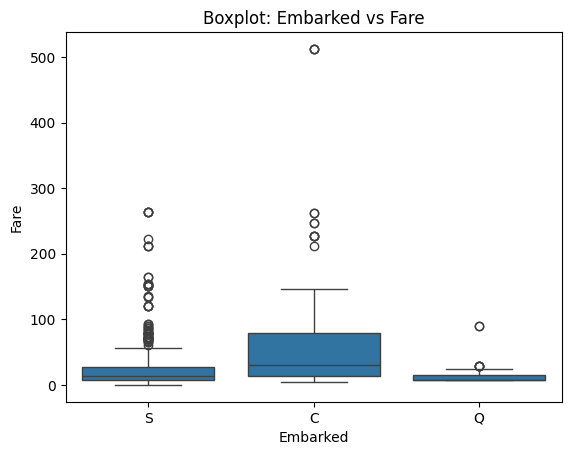

Embarked Vs Age


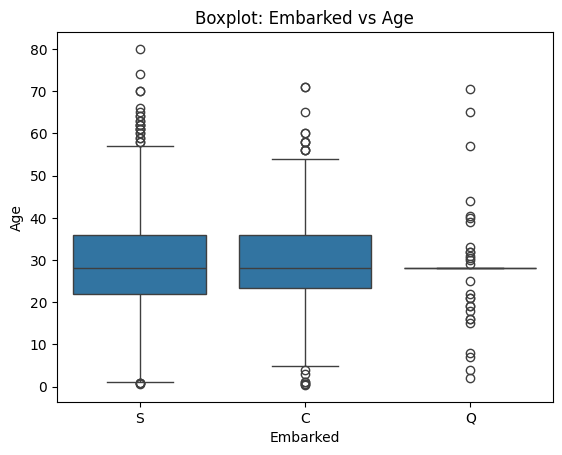

In [57]:
ls = []

for i in cat_cols:
    for j in cont_cols:
        print(i, "Vs", j)
        ls.append((i, j))
        sns.boxplot(x=df[i], y=df[j])  # Explicitly set x and y for the boxplot
        plt.title(f'Boxplot: {i} vs {j}')
        plt.show()

Survived Vs Fare


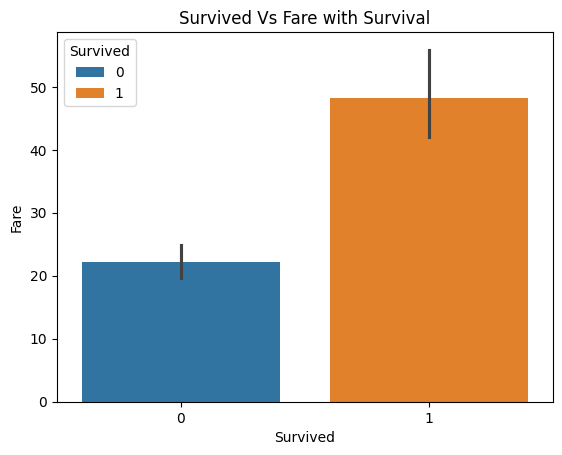

Survived Vs Age


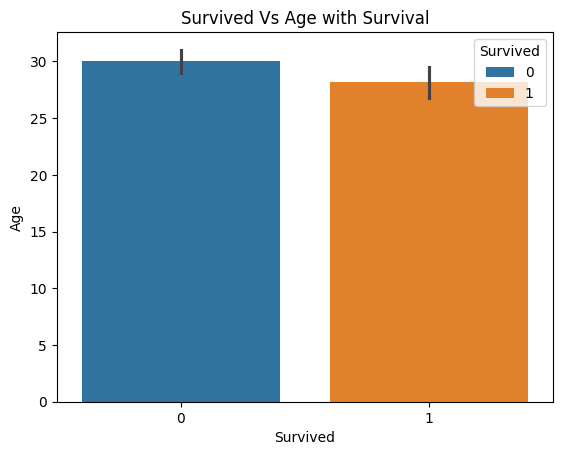

Pclass Vs Fare


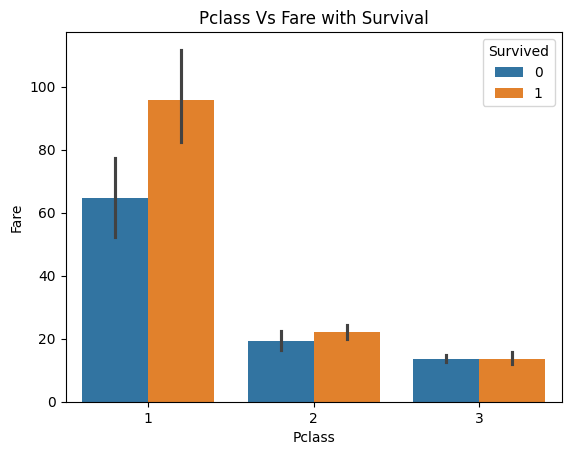

Pclass Vs Age


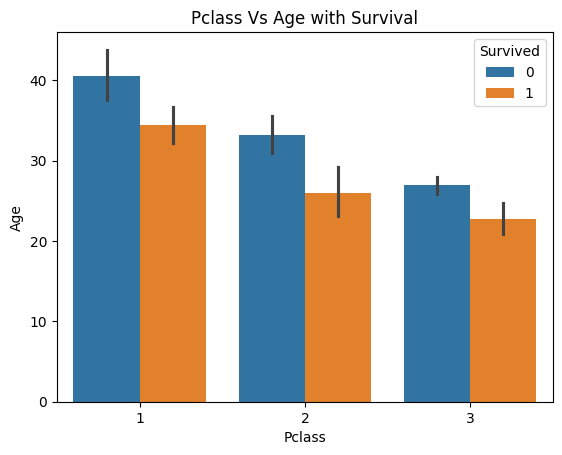

Sex Vs Fare


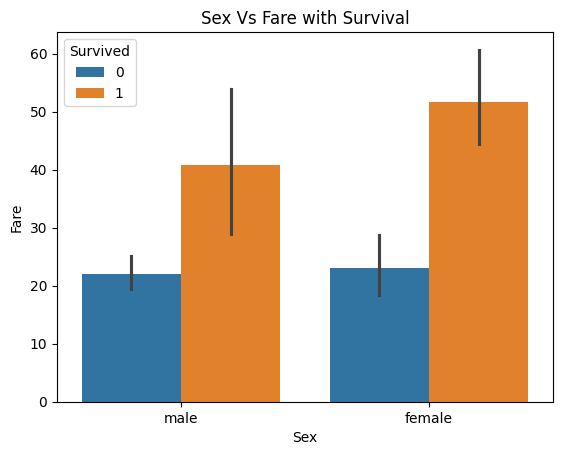

Sex Vs Age


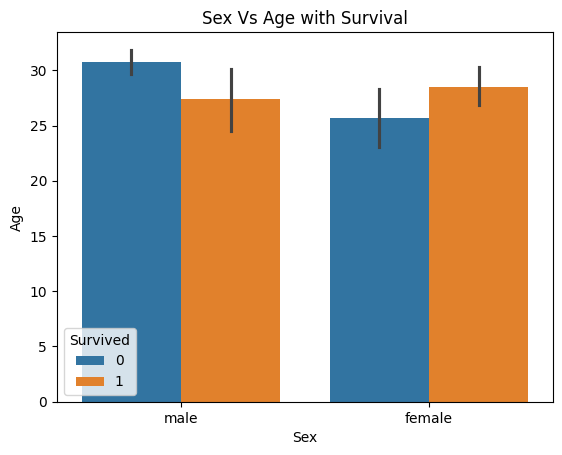

SibSp Vs Fare


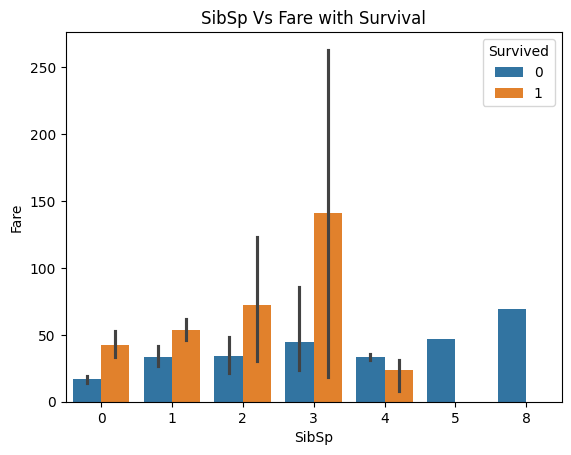

SibSp Vs Age


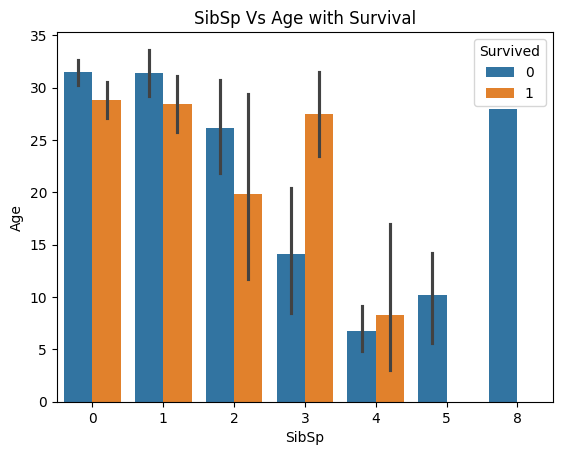

Parch Vs Fare


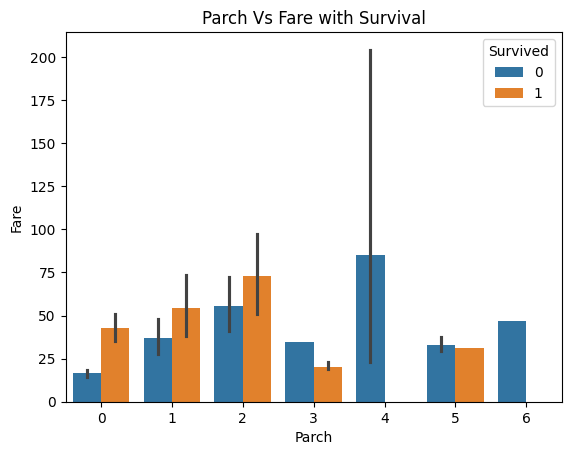

Parch Vs Age


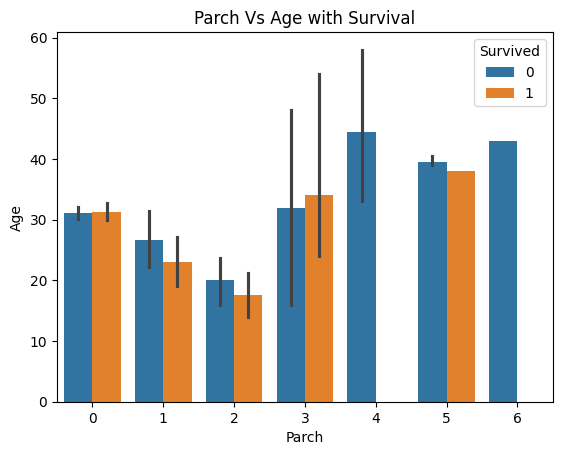

Embarked Vs Fare


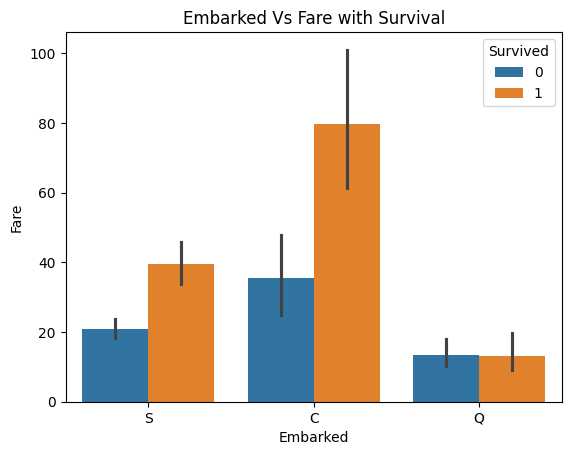

Embarked Vs Age


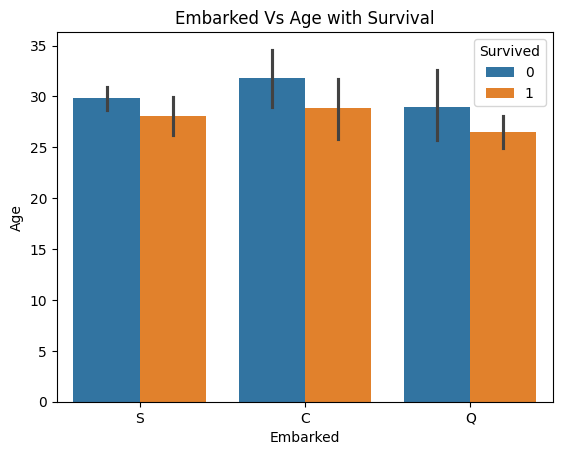

In [58]:
for i in cat_cols:
    for j in cont_cols:
        print(i, "Vs", j)
        ls.append((i, j))
        sns.barplot(x=df[i], y=df[j], hue=df['Survived'])  # Adding hue for survival
        plt.title(f'{i} Vs {j} with Survival')
        plt.show()


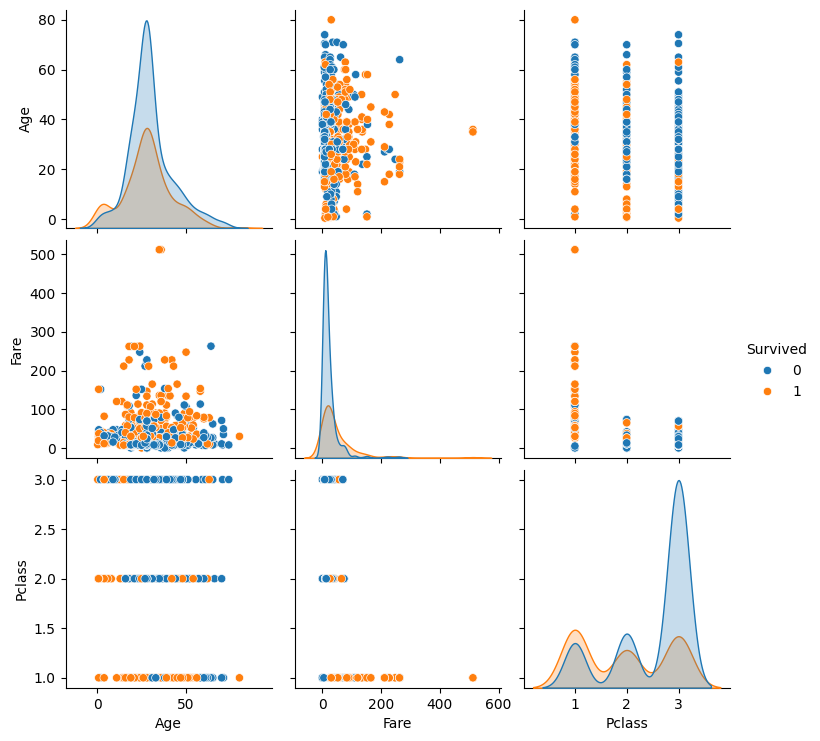

In [59]:
# Pair plot to see pairwise relationships in the dataset
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.show()

<Axes: >

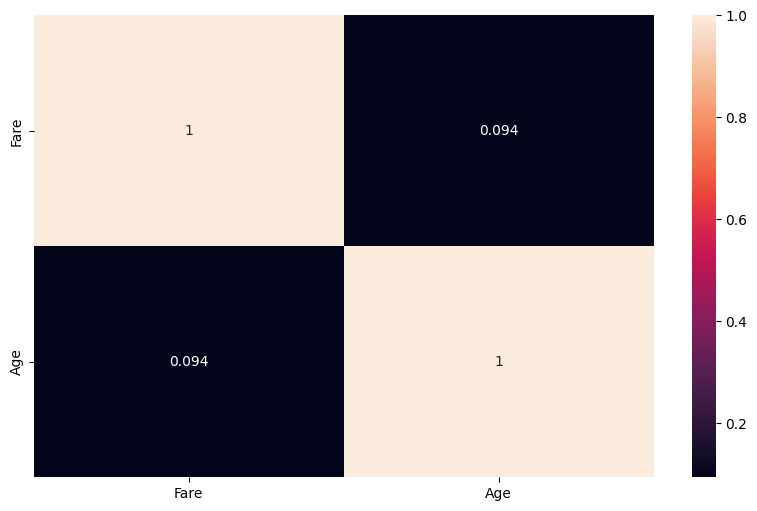

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df[cont_cols].corr(),annot=True)

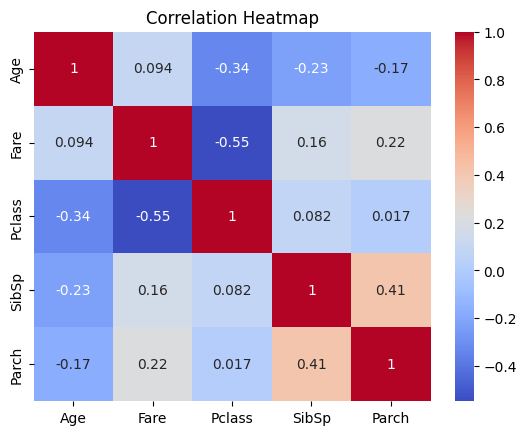

In [61]:
corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

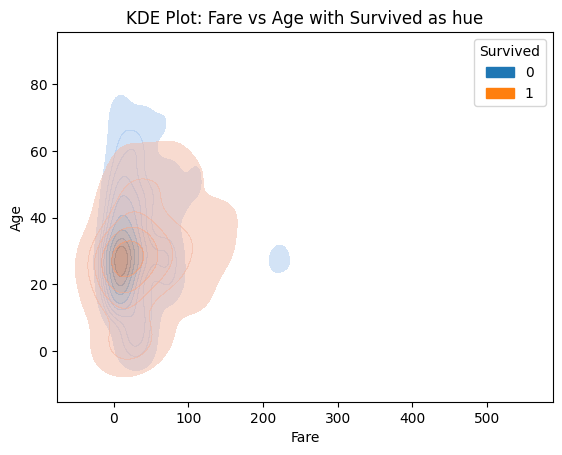

In [62]:
# KDE plot to show density distribution of Age and Fare
sns.kdeplot(data=df, x='Fare', y='Age', hue='Survived', fill=True, alpha=0.5)  # Set alpha for transparency
plt.title('KDE Plot: Fare vs Age with Survived as hue')
plt.show()

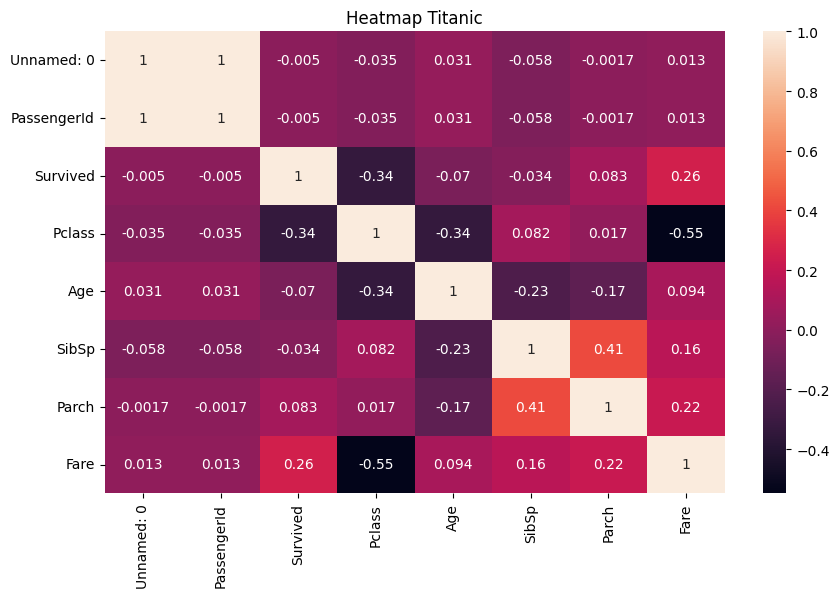

In [63]:
# df.describe().columns

# task1
df_num_cols = df.select_dtypes(include= ['number'])

df_num_corr = df_num_cols.corr()

# task 2
plt.figure(figsize = (10,6))

#task 3
sns.heatmap(df_num_corr, annot = True)

# task4
plt.title("Heatmap Titanic")

plt.show()